In [1]:
import sys
sys.path.append("../../")

In [2]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_Smooth, fB_Smooth, showSmoothFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue
import pandas as pd

In [3]:
filePrefix = 'lin-smooth'

In [4]:
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=20': {'ds': {'tau=1': '../../csv/N=20/lin-smooth-ds-tau-1.csv',
   'tau=2': '../../csv/N=20/lin-smooth-ds-tau-2.csv',
   'tau=3': '../../csv/N=20/lin-smooth-ds-tau-3.csv',
   'tau=4': '../../csv/N=20/lin-smooth-ds-tau-4.csv',
   'tau=5': '../../csv/N=20/lin-smooth-ds-tau-5.csv',
   'tau=6': '../../csv/N=20/lin-smooth-ds-tau-6.csv',
   'tau=20': '../../csv/N=20/lin-smooth-ds-tau-20.csv',
   'tau=50': '../../csv/N=20/lin-smooth-ds-tau-50.csv'},
  'taus': {'d=1': '../../csv/N=20/lin-smooth-taus-d-1.csv',
   'd=2': '../../csv/N=20/lin-smooth-taus-d-2.csv',
   'd=3': '../../csv/N=20/lin-smooth-taus-d-3.csv',
   'd=20': '../../csv/N=20/lin-smooth-taus-d-20.csv',
   'd=50': '../../csv/N=20/lin-smooth-taus-d-50.csv',
   'd=150': '../../csv/N=20/lin-smooth-taus-d-150.csv'}},
 'N=100': {'ds': {'tau=1': '../../csv/N=100/lin-smooth-ds-tau-1.csv',
   'tau=2': '../../csv/N=100/lin-smooth-ds-tau-2.csv',
   'tau=3': '../../csv/N=100/lin-smooth-ds-tau-3.csv',
   'tau=4': '../../csv/N=100/lin-smooth

In [4]:
simulation = Simulation(FunctionType.SMOOTH, (0, 0), calculateValue, calc.linear(N=100, w=0.99))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(100000000) # 10^8
simulation.setD(20)
simulation.setOmega(1)

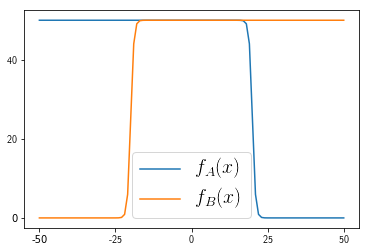

In [5]:
N = 100
showSmoothFunctions(fA_Smooth, fB_Smooth, N, d=20, omega=1)

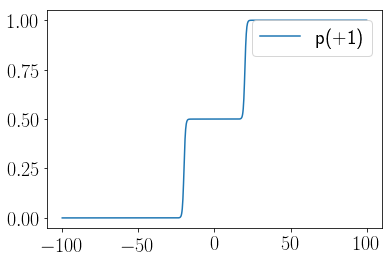

In [6]:
calc.plot(calc.smooth(d=20))

µ =  0.014208290686985791


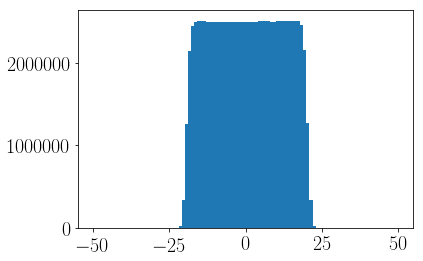

In [7]:
simulation.setTau((0, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram0')

µ =  -2.6877165572352464


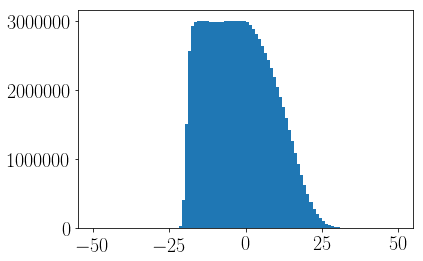

In [8]:
simulation.setTau((20, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauA')

µ =  2.7257042880309026


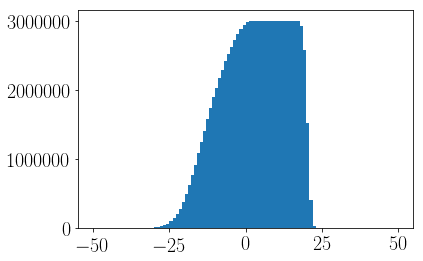

In [9]:
simulation.setTau((0, 20))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauB')

In [10]:
simulation.setIterations(10)

In [11]:
taus, mus = [], [] 
simulation.setD(20)

print('d, τ, µ')
for i in range(0, 35):
    tauA = i * 2
    simulation.setTau((tauA, 0))
    simulation.run()
    simulation.systematicInfo()
    taus.append(tauA)
    mus.append(simulation.getAverage())

steps = len(taus)
data = {'d': [20]*steps, 'τ': taus, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['taus']);

d, τ, µ
20 ,  0 ,  -0.05919178799496374
20 ,  2 ,  -0.16648156149688723
20 ,  4 ,  -0.41686401138929824
20 ,  6 ,  -0.7186705695633108
20 ,  8 ,  -1.1047056900984409
20 ,  10 ,  -1.3172644883770992
20 ,  12 ,  -1.620313174473603
20 ,  14 ,  -1.941089198345563
20 ,  16 ,  -2.206709983790582
20 ,  18 ,  -2.433988012003598
20 ,  20 ,  -2.7342346119295784
20 ,  22 ,  -2.9726719337521113
20 ,  24 ,  -3.1957265117622833
20 ,  26 ,  -3.38464477677714
20 ,  28 ,  -3.5958392151697525
20 ,  30 ,  -3.7706034737542637
20 ,  32 ,  -3.913394638909714
20 ,  34 ,  -4.101545918035273
20 ,  36 ,  -4.184734673268151
20 ,  38 ,  -4.276870016253619
20 ,  40 ,  -4.308837524040644
20 ,  42 ,  -4.39087665567984
20 ,  44 ,  -4.438551423408686
20 ,  46 ,  -4.4318435970747805
20 ,  48 ,  -4.507987454751748
20 ,  50 ,  -4.478474778670982
20 ,  52 ,  -4.524195046439319
20 ,  54 ,  -4.503675365478343
20 ,  56 ,  -4.5206931573137
20 ,  58 ,  -4.497190800765596
20 ,  60 ,  -4.545037715848201
20 ,  62 ,  -4.5430673691

Mean squared error: 0.13
Variance score: 0.94
Line: -0.10x + -0.474580


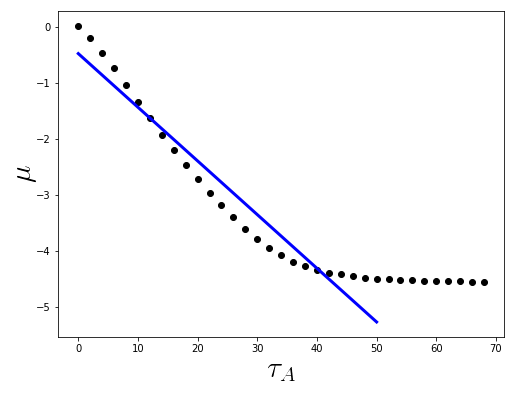

In [4]:
df = pd.read_csv(csvFilename['taus'])
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/tau-d50', forHalfN=True, N=100);

In [13]:
ds, mus = [], []
simulation.setTau((50, 0))

print('d, τ, µ')
_ = np.arange(0, 48, step=2)
_ = np.union1d(_, np.arange(47, 51))
_ = np.union1d(_, np.arange(52, 72, step=2))
for d in _:
    simulation.setD(d)
    simulation.run()
    simulation.systematicInfo()
    ds.append(d)
    mus.append(simulation.getAverage())
    
steps = len(ds)
data = {'d': ds, 'τ': [50]*steps, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['ds']);

d, τ, µ


KeyboardInterrupt: 

Mean squared error: 0.26
Variance score: 0.76
Line: -0.07x + -0.714696


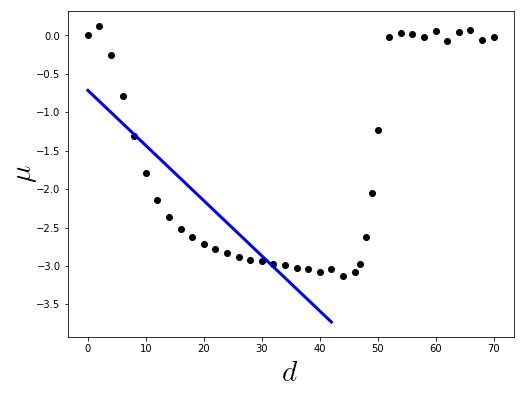

In [5]:
df = pd.read_csv(csvFilename['ds'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/d-tau50', forHalfN=True, N=100);

In [7]:
df = pd.read_csv(csvFilename['N=100']['ds']['tau=20'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/d-tau20', forHalfN=True, N=100);

FileNotFoundError: [Errno 2] File b'../../csv/N=100/lin-smooth-ds-tau-20.csv' does not exist: b'../../csv/N=100/lin-smooth-ds-tau-20.csv'